In [19]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']
X.shape

(307, 2)

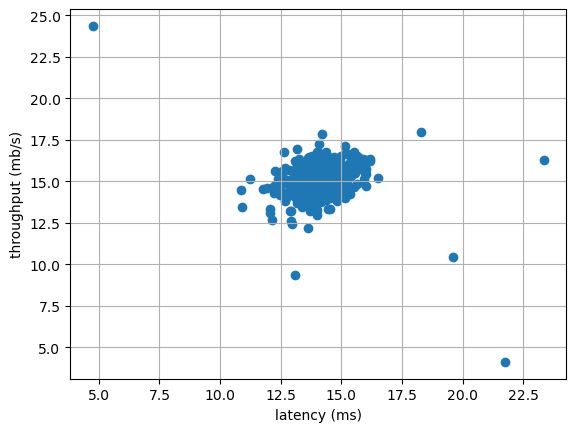

In [20]:
plt.scatter(X[:,0], X[:,1])
plt.grid()
plt.xlabel('latency (ms)')
plt.ylabel('throughput (mb/s)')
plt.show()

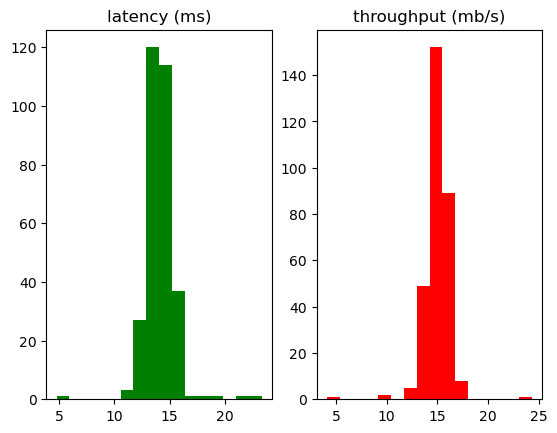

In [21]:
plt.subplot(1,2,1)
plt.hist(X[:,0], bins = 16, color="green")
plt.title(f'latency (ms)')

plt.subplot(1,2,2)
plt.hist(X[:,1], bins = 16, color="red")
plt.title(f'throughput (mb/s)')
plt.show()

### Gaussian distribution

In [22]:
def estimate_gaussian(X):  
    mu = X.mean(axis=0) 
    sigma = X.std(axis=0)
    return mu, sigma

[[mean_1, mean_2],[sd_1, sd_2]]=estimate_gaussian(X)
print(f'Latency:\n    mean = {mean_1}\n    standard deviation = {sd_1}')
print(f'Throughput:\n    mean = {mean_2}\n    standard deviation = {sd_2}')

Latency:
    mean = 14.112225783945592
    standard deviation = 1.353747174879607
Throughput:
    mean = 14.99771050813621
    standard deviation = 1.3075723042450764


### Calculate probability

In [23]:
Xval = data['Xval']  
yval = data['yval']
print(f'{Xval.shape}')
print(f'{yval.shape}')

(307, 2)
(307, 1)


In [24]:
from scipy import stats

In [25]:
p = np.zeros((X.shape[0], X.shape[1]))
p[:, 0] = stats.norm.pdf(X[:, 0], loc=mean_1, scale=sd_1)
p[:, 1] = stats.norm.pdf(X[:, 1], loc=mean_2, scale=sd_2)

pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:, 0] = stats.norm.pdf(Xval[:, 0], loc=mean_1, scale=sd_1)
pval[:, 1] = stats.norm.pdf(Xval[:, 1], loc=mean_2, scale=sd_2)

### Selecting the threshold

In [26]:
from sklearn.metrics import f1_score 

def select_threshold(pval, yval):
    thresholds = np.linspace(pval.min(), pval.max(), 10000)
    best_f1 = 0

    for th in thresholds:
        ypred = (pval[:, 0] < th) | (pval[:, 1] < th)
        new = f1_score(yval, ypred.astype(int))
        if new > best_f1:
            best_f1 = new
            best_epsilon = th
    return best_epsilon, best_f1

best_epsilon, best_f1 = select_threshold(pval, yval)
best_epsilon, best_f1

(0.0003966715195093453, 0.8750000000000001)

### Anomaly detection result

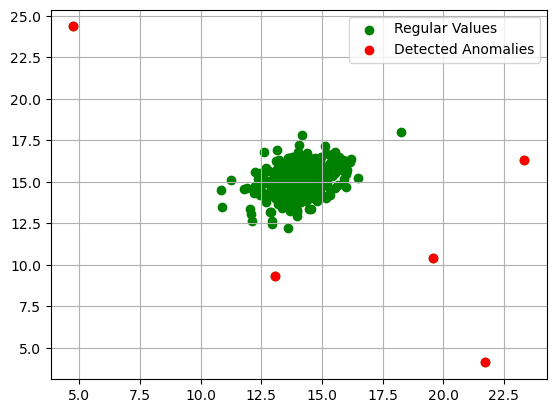

In [27]:
anom_idx = np.where((p[:, 0] < best_epsilon) | (p[:, 1] < best_epsilon))
anomalies = [X[i] for i in anom_idx][0]

plt.scatter(X[:,0], X[:,1], color="green")
plt.scatter(anomalies[:,0], anomalies[:,1], color="red")
plt.grid()
plt.legend(["Regular Values", "Detected Anomalies"])
plt.show()